In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [3]:
data = pd.read_csv('book.csv')
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
data.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

## Association Rules

In [6]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [7]:
items = pd.DataFrame(data.sum())
items = items.sort_values(0 ,ascending=False)
items.head(10).style.background_gradient(cmap='Greens')

,0
CookBks,862
ChildBks,846
DoItYBks,564
GeogBks,552
YouthBks,495
ArtBks,482
RefBks,429
ItalCook,227
Florence,217
ItalArt,97


In [8]:
# Checking for the items with there support values
frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\ayush\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
589,0.0125,"(ItalCook, ItalAtlas, RefBks, ItalArt, CookBks...",6
590,0.0145,"(YouthBks, RefBks, ChildBks, GeogBks, CookBks,...",7
591,0.0105,"(ItalCook, ChildBks, ItalArt, GeogBks, CookBks...",7
592,0.0100,"(ItalCook, RefBks, ItalArt, GeogBks, CookBks, ...",7


In [9]:
# printing the frequntly items with length 3
fi_len1 = frequent_itemsets[ (frequent_itemsets['length'] == 1) ]
fi_len1

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.0370,(ItalAtlas),1
9,0.0485,(ItalArt),1


In [10]:
frequent_itemsets.shape

(594, 3)

In [11]:
# Average support for different lengths
support_df = frequent_itemsets.groupby('length').agg(['mean' , 'max' , 'min' , 'count'])
support_df

support                      
            mean     max     min count
length                                
1       0.220227  0.4310  0.0370    11
2       0.080741  0.2560  0.0125    54
3       0.040066  0.1495  0.0100   143
4       0.024637  0.0890  0.0100   200
5       0.017906  0.0535  0.0100   139
6       0.014419  0.0310  0.0100    43
7       0.011500  0.0145  0.0100     4

+ As we can see from above table the 'Average' , 'Maximum' , 'Minimum' and 'count' of frequent items.
+ if we have to consider a perticular length of items so we have to keep our support in between the 'Minimum' and 'Maximum' value of support that we have calculated above.

In [12]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.01)
# rules

In [13]:
rules['length'] = rules['consequents'].map(lambda x:len(x)+1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,2
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,2
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,2
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,2
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347,2


In [14]:
con_lift_df = rules.groupby(rules['length']).agg(['mean' , 'max' , 'min' , 'count'])[['confidence' , 'lift']]
con_lift_df

confidence                                lift                       \
             mean       max       min count      mean        max       min   
length                                                                       
2        0.628341  1.000000  0.066125  2318  3.495823  23.023023  0.949588   
3        0.396467  1.000000  0.024362  3748  5.227519  50.000000  0.949588   
4        0.250828  1.000000  0.023202  3190  5.968651  58.275058  1.018676   
5        0.160503  0.880000  0.023202  1480  5.980090  57.971014  1.190908   
6        0.105689  0.666667  0.023202   342  5.596044  47.826087  1.654846   
7        0.073936  0.297297  0.023202    28  5.288365  20.503262  1.654846   

              
       count  
length        
2       2318  
3       3748  
4       3190  
5       1480  
6        342  
7         28

+ From this table we decide our confidence and we can adjust it accordingly

### Ploting Confidence Vs Support

In [15]:
support=rules['support'].to_numpy()
confidence=rules['confidence'].to_numpy()

<Figure size 720x576 with 0 Axes>

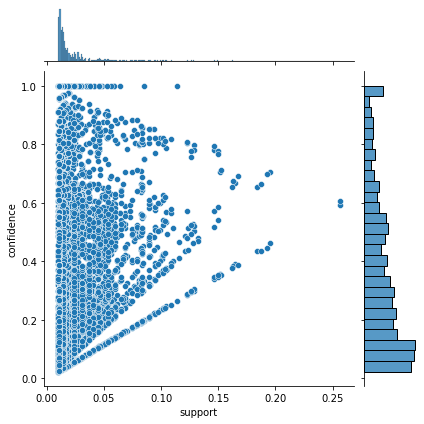

In [16]:
plt.figure(figsize = (10,8))
# plt.scatter(support, confidence)
sns.jointplot(x = 'support',y = 'confidence',data = rules,kind = 'scatter')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

+ From this graph we can observe that only two rules were there with high confidence and high support

## Rules for any item-itemset but Confidence is 1

In [17]:
frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\ayush\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
589,0.0125,"(ItalCook, ItalAtlas, RefBks, ItalArt, CookBks...",6
590,0.0145,"(YouthBks, RefBks, ChildBks, GeogBks, CookBks,...",7
591,0.0105,"(ItalCook, ChildBks, ItalArt, GeogBks, CookBks...",7
592,0.0100,"(ItalCook, RefBks, ItalArt, GeogBks, CookBks, ...",7


In [18]:
rules = association_rules(frequent_itemsets,  min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.0,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.0,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.0,4.149378,0.036812,inf
3,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.0,2.320186,0.048365,inf
4,"(ItalAtlas, ChildBks)",(RefBks),0.0285,0.2145,0.0285,1.0,4.662005,0.022387,inf
...,...,...,...,...,...,...,...,...,...
337,"(ItalCook, ItalAtlas, ItalArt, CookBks, ChildB...",(RefBks),0.0110,0.2145,0.0110,1.0,4.662005,0.008640,inf
338,"(ItalCook, ItalAtlas, RefBks, ItalArt, ChildBks)","(ArtBks, CookBks)",0.0110,0.1670,0.0110,1.0,5.988024,0.009163,inf
339,"(ItalCook, ItalAtlas, ItalArt, CookBks, ChildBks)","(ArtBks, RefBks)",0.0110,0.0895,0.0110,1.0,11.173184,0.010016,inf
340,"(ItalCook, ItalAtlas, ItalArt, ChildBks, ArtBks)","(CookBks, RefBks)",0.0110,0.1525,0.0110,1.0,6.557377,0.009322,inf


### Ploting Confidence Vs Support

<Figure size 720x576 with 0 Axes>

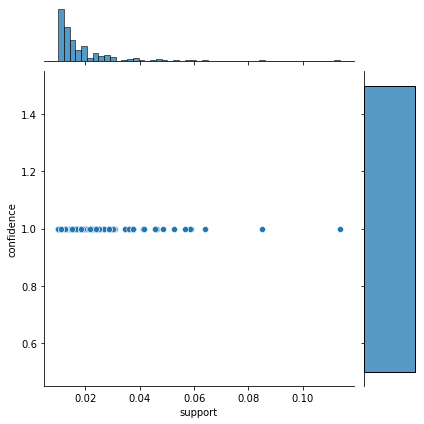

In [19]:
support=rules['support'].to_numpy()
confidence=rules['confidence'].to_numpy()

plt.figure(figsize = (10,8))
# plt.scatter(support, confidence)
sns.jointplot(x = 'support',y = 'confidence',data = rules,kind = 'scatter')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### Ploting Lift Vs Confidence

<Figure size 720x576 with 0 Axes>

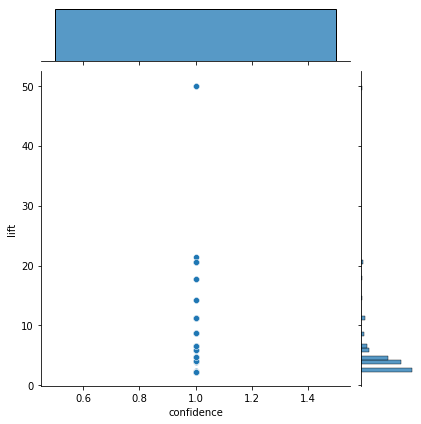

In [20]:
lift=rules['lift'].to_numpy()
confidence=rules['confidence'].to_numpy()

plt.figure(figsize = (10,8))
# plt.scatter(confidence , lift)
sns.jointplot(x = 'confidence',y = 'lift',data = rules,kind = 'scatter')
plt.xlabel('confidence')
plt.ylabel('lift') 
plt.show()

#### Rules having High Lift and Confidence but low support

In [21]:
rules[rules['lift']>20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
112,"(ArtBks, ItalAtlas, GeogBks)",(ItalArt),0.0115,0.0485,0.0115,1.0,20.618557,0.010942,inf
175,"(ArtBks, ChildBks, ItalAtlas, GeogBks)",(ItalArt),0.0100,0.0485,0.0100,1.0,20.618557,0.009515,inf
235,"(ArtBks, ItalAtlas, RefBks, GeogBks)",(ItalArt),0.0115,0.0485,0.0115,1.0,20.618557,0.010942,inf
238,"(ArtBks, ItalAtlas, GeogBks)","(ItalArt, RefBks)",0.0115,0.0200,0.0115,1.0,50.000000,0.011270,inf
283,"(ChildBks, ItalAtlas, CookBks, GeogBks)","(ItalCook, RefBks)",0.0135,0.0465,0.0135,1.0,21.505376,0.012872,inf
298,"(ItalAtlas, RefBks, GeogBks, ChildBks, ArtBks)",(ItalArt),0.0100,0.0485,0.0100,1.0,20.618557,0.009515,inf
301,"(ArtBks, ChildBks, ItalAtlas, GeogBks)","(ItalArt, RefBks)",0.0100,0.0200,0.0100,1.0,50.000000,0.009800,inf


## Rules for 4 item-itemset

+ for 4 item-itemset we have to set our support b/w (0.089 , 0.01) and confidence b/w (1 , 0.023)

In [22]:
frequent_itemsets = apriori(data, min_support=0.055, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\ayush\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
85,0.0835,"(ArtBks, GeogBks, CookBks, ChildBks)",4
86,0.0595,"(GeogBks, ArtBks, DoItYBks, ChildBks)",4
87,0.0600,"(YouthBks, GeogBks, CookBks, DoItYBks)",4
88,0.0560,"(ArtBks, YouthBks, GeogBks, CookBks)",4


In [23]:
rules = association_rules(frequent_itemsets,  min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
200,"(ArtBks, GeogBks, DoItYBks)",(CookBks),0.0730,0.4310,0.0650,0.890411,2.065919,0.033537,5.192125
201,"(ArtBks, CookBks, DoItYBks)",(GeogBks),0.1015,0.2760,0.0650,0.640394,2.320268,0.036986,2.013315
202,"(GeogBks, CookBks, DoItYBks)",(ArtBks),0.1085,0.2410,0.0650,0.599078,2.485802,0.038852,1.893138
203,"(ArtBks, GeogBks)","(CookBks, DoItYBks)",0.1275,0.1875,0.0650,0.509804,2.718954,0.041094,1.657500


### Ploting Lift Vs Confidence

<Figure size 720x576 with 0 Axes>

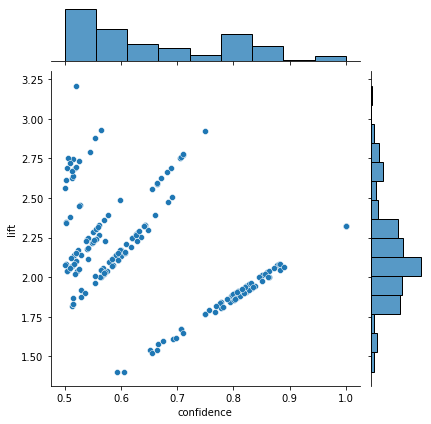

In [24]:
lift=rules['lift'].to_numpy()
confidence=rules['confidence'].to_numpy()

plt.figure(figsize = (10,8))
# plt.scatter(confidence , lift)
sns.jointplot(x = 'confidence',y = 'lift',data = rules,kind = 'scatter')
plt.xlabel('confidence')
plt.ylabel('lift') 
plt.show()

## Rules for 3 item-itemset

+ for 3 item-itemset we have to set our support b/w (0.14 , 0.01) and confidence b/w (1 , 0.024)

In [25]:
frequent_itemsets = apriori(data, min_support=0.09, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\ayush\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [26]:
rules = association_rules(frequent_itemsets,  min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
63,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
64,"(CookBks, DoItYBks)",(GeogBks),0.1875,0.276,0.1085,0.578667,2.096618,0.056750,1.718354
65,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
66,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063


### Ploting Lift Vs Confidence

<Figure size 720x576 with 0 Axes>

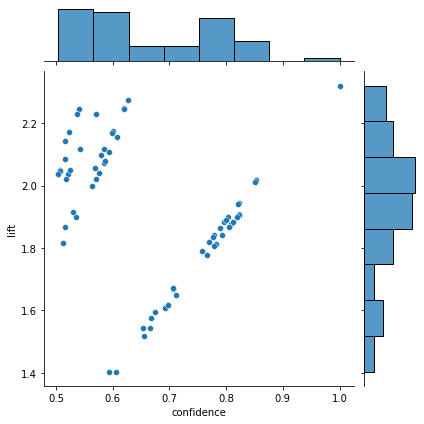

In [27]:
lift=rules['lift'].to_numpy()
confidence=rules['confidence'].to_numpy()

plt.figure(figsize = (10,8))
# plt.scatter(confidence , lift)
sns.jointplot(x = 'confidence',y = 'lift',data = rules,kind = 'scatter')
plt.xlabel('confidence')
plt.ylabel('lift') 
plt.show()

## Rules for 2 item-itemset

+ for 2 item-itemset we have to set our support b/w (0.25 , 0.012) and confidence b/w (1 , 0.66)

In [28]:
frequent_itemsets = apriori(data, min_support=0.15, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\ayush\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(CookBks, ChildBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2


In [29]:
rules = association_rules(frequent_itemsets,  min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556


### Ploting Lift Vs Confidence

<Figure size 720x576 with 0 Axes>

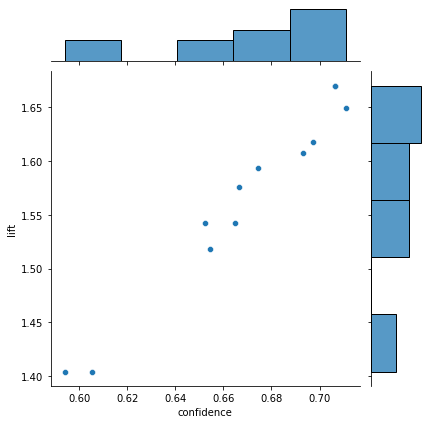

In [30]:
lift=rules['lift'].to_numpy()
confidence=rules['confidence'].to_numpy()

plt.figure(figsize = (10,8))
# plt.scatter(confidence , lift)
sns.jointplot(x = 'confidence',y = 'lift',data = rules,kind = 'scatter')
plt.xlabel('confidence')
plt.ylabel('lift') 
plt.show()